# Trainer Computer Vision
---

## **Module 2 - Step 2**

Objective : 
- Getting used to local python notebook environment (jupyter/jupyter-lab, vscode, etc...)
- Creating model case of binary multi-class classification
- Creating model to classify 1st face, 2nd face and no face environment

### Import Library

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import utilities_modul as util
import json

Matplotlib is building the font cache; this may take a moment.


### Read Credential

In [2]:
f = open("trainer-userdata.json")
data = json.load(f)
usermail = data["email"]

### Prepare Dataset

In [3]:
base_dir = "./dataset"

In [4]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1/255,
    validation_split = 0.2
)
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1/255,
    validation_split = 0.2
)

In [7]:
img_shape = (224, 224, 3)
train_generator = train_datagen.flow_from_directory(
    base_dir,
    shuffle=True,
    target_size= img_shape[:2],
    class_mode='categorical',
    batch_size=8,
    subset='training')

validation_generator = validation_datagen.flow_from_directory(
    base_dir,
    shuffle=True,
    target_size= img_shape[:2],
    class_mode='categorical',
    batch_size=2,
    subset='validation')

Found 48 images belonging to 3 classes.
Found 12 images belonging to 3 classes.


### DNN Model

Add more layers if you want to!

Refer to https://www.tensorflow.org/api_docs/python/tf/keras/layers

In [12]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (2,2), activation='relu', input_shape=img_shape),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(8, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [13]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 223, 223, 8)       104       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 110, 110, 8)       264       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 24200)             0         
_________________________________________________________________
dense (Dense)                (None, 16)                387216    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 5

### Model Training

In [19]:
# Cek Available RAM terlebih dahulu
!free -h

              total        used        free      shared  buff/cache   available
Mem:           3,9G        3,1G        546M         30M        258M        605M
Swap:          1,9G        1,7G        227M


In [18]:
# Jalankan kode ini ketika terjadi ResourceExhaustError
!echo "upi123" | sudo -S -k sh -c 'echo 3 > /proc/sys/vm/drop_caches' 

[sudo] password for trainercv: 

In [15]:
with tf.device('/device:GPU:0'):
  history = model.fit(train_generator, 
                      epochs = 10, 
                      validation_data = validation_generator, 
                      verbose = 1)

Epoch 1/10
6/6 [==============================] - 2s 178ms/step - loss: 0.6944 - accuracy: 0.5417 - val_loss: 0.4337 - val_accuracy: 1.0000
Epoch 2/10
6/6 [==============================] - 1s 133ms/step - loss: 0.3351 - accuracy: 1.0000 - val_loss: 0.1983 - val_accuracy: 1.0000
Epoch 3/10
6/6 [==============================] - 1s 141ms/step - loss: 0.1400 - accuracy: 1.0000 - val_loss: 0.0871 - val_accuracy: 1.0000
Epoch 4/10
6/6 [==============================] - 1s 140ms/step - loss: 0.0635 - accuracy: 1.0000 - val_loss: 0.0383 - val_accuracy: 1.0000
Epoch 5/10
6/6 [==============================] - 1s 142ms/step - loss: 0.0256 - accuracy: 1.0000 - val_loss: 0.0136 - val_accuracy: 1.0000
Epoch 6/10
6/6 [==============================] - 1s 135ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 1s 130ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 8/10
6/6 [====

### Model Evaluation

In [17]:
stats = model.evaluate(validation_generator)
print(f'Accuracy test = {stats[1]*100}%\nLoss test = {stats[0]*100}%')

6/6 [==============================] - 0s 15ms/step - loss: 0.0021 - accuracy: 1.0000
Accuracy test = 100.0%
Loss test = 0.21153725683689117%


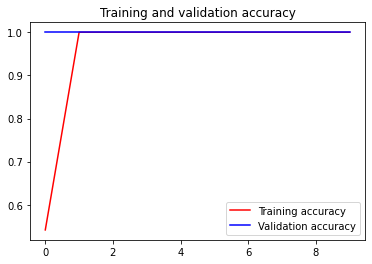

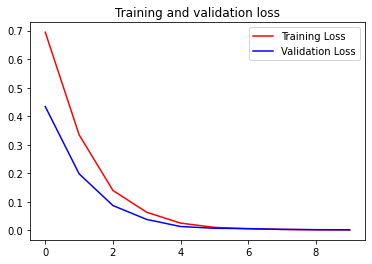

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [19]:
validation_generator.class_indices

{'empty': 0, 'firstface': 1, 'secondface': 2}

### Model Saving

In [20]:
model.save('model_module-2.h5')

### Grading

In [ ]:
# DON'T EDIT THIS
# RUN ONLY ONE TIME AFTER YOU FINISH ALL THE CELLS ABOVE
util.give_grading(usermail=usermail, steps=2, optionalParam=stats)